In [1]:
#import Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
from sklearn import linear_model
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#import Data
df = pd.read_csv('kc_house_data.csv')
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1,9808700762,20140611T000000,7060000.0,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


In [3]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016798,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016798,1.000000,0.308338,0.525133,0.702042,0.089654,0.256787,0.266331,0.397347,0.036392,0.667462,0.605565,0.323836,0.053981,0.126443,-0.053168,0.306919,0.021570,0.585372,0.082454
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525133,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702042,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089654,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256787,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397347,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401819e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673618e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


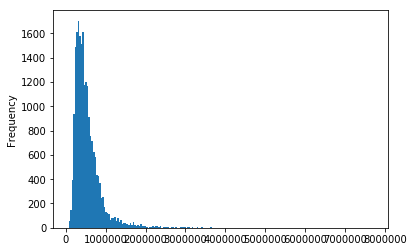

In [5]:
df.price.plot(kind='hist', bins=200);

In [6]:
df[df['price']>4000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1,9808700762,20140611T000000,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2,9208900037,20140919T000000,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
5,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
6,1247600105,20141020T000000,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
7,1924059029,20140617T000000,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
9,3835500195,20140618T000000,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


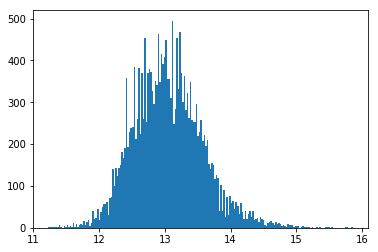

In [7]:
plt.hist((np.log(df.price)), bins=200);

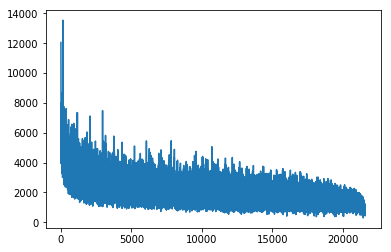

In [8]:
df.sqft_living.plot()

In [9]:
df[df.sqft_living>6000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1,9808700762,20140611T000000,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2,9208900037,20140919T000000,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
5,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
6,1247600105,20141020T000000,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
7,1924059029,20140617T000000,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
9,3835500195,20140618T000000,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


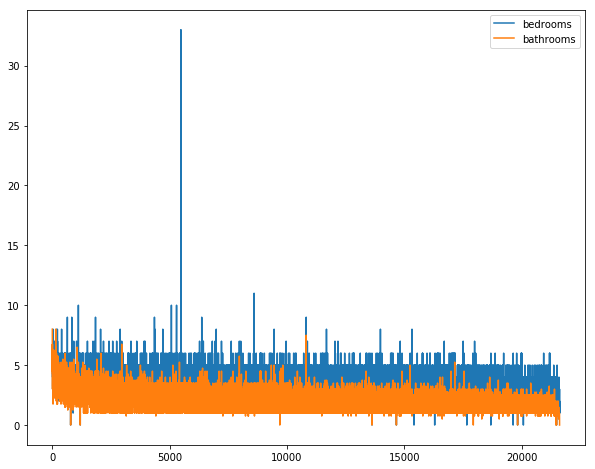

In [10]:
plt.figure(figsize=(10,8))
df.bedrooms.plot(), df.bathrooms.plot()
plt.legend();

In [11]:
df[df['bedrooms']>8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
641,8823900290,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,0,...,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320
829,9822700190,20140808T000000,1280000.0,9,4.50,3650,5000,2.0,0,0,...,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000
1110,627300145,20140814T000000,1150000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
1840,8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,...,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
4351,2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,...,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
5073,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
5293,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
5479,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
6366,1997200215,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,...,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291
8598,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960


In [12]:
df[df.bathrooms>5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
2,9208900037,20140919T000000,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
5,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
6,1247600105,20141020T000000,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
7,1924059029,20140617T000000,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
10,6065300370,20150506T000000,4210000.0,5,6.00,7440,21540,2.0,0,0,...,12,5550,1890,2003,0,98006,47.5692,-122.189,4740,19329
11,6447300265,20141014T000000,4000000.0,4,5.50,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996
13,853200010,20140701T000000,3800000.0,5,5.50,7050,42840,1.0,0,2,...,13,4320,2730,1978,0,98004,47.6229,-122.220,5070,20570


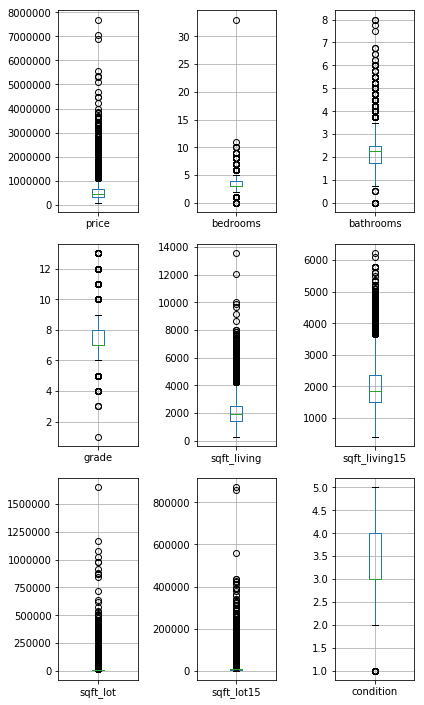

In [13]:
fig = plt.figure(figsize=(6,10))

ax1 = plt.subplot(331)
ax2 = plt.subplot(332)
ax3 = plt.subplot(333)
ax4 = plt.subplot(334)
ax5 = plt.subplot(335)
ax6 = plt.subplot(336)
ax7 = plt.subplot(337)
ax8 = plt.subplot(338)
ax9 = plt.subplot(339)

df.boxplot(column='price', ax=ax1)
df.boxplot(column='bedrooms', ax=ax2)
df.boxplot(column='bathrooms', ax=ax3)
df.boxplot(column='grade', ax=ax4)
df.boxplot(column='sqft_living', ax=ax5)
df.boxplot(column='sqft_living15', ax=ax6)
df.boxplot(column='sqft_lot', ax=ax7)
df.boxplot(column='sqft_lot15', ax=ax8)
df.boxplot(column='condition', ax=ax9)

plt.suptitle('')
plt.tight_layout()

In [14]:
df.quantile(.99).astype('int')

id               9558728047
price               1968800
bedrooms                  6
bathrooms                 4
sqft_living            4978
sqft_lot             213008
floors                    3
waterfront                0
view                      4
condition                 5
grade                    11
sqft_above             4370
sqft_basement          1660
yr_built               2014
yr_renovated           2008
zipcode               98199
lat                      47
long                   -121
sqft_living15          4080
sqft_lot15           157687
Name: 0.99, dtype: int64

In [15]:
outliers = df.quantile(.95)
outliers

id               9.297300e+09
price            1.160000e+06
bedrooms         5.000000e+00
bathrooms        3.500000e+00
sqft_living      3.760000e+03
sqft_lot         4.333920e+04
floors           2.000000e+00
waterfront       0.000000e+00
view             2.000000e+00
condition        5.000000e+00
grade            1.000000e+01
sqft_above       3.400000e+03
sqft_basement    1.190000e+03
yr_built         2.011000e+03
yr_renovated     0.000000e+00
zipcode          9.817700e+04
lat              4.774964e+01
long            -1.219790e+02
sqft_living15    3.300000e+03
sqft_lot15       3.706280e+04
Name: 0.95, dtype: float64

In [16]:
#Filtering Data
#1 Removing Outliers
outliers = df.quantile(.95)
x = df[(df['price']<outliers['price'])]
x = x[(df['bedrooms']<outliers['bedrooms'])]
x = x[(df['sqft_living']<outliers['sqft_living'])]
x.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(18566, 21)

In [17]:
df.groupby(['zipcode','waterfront'])[['price']].mean()

price
zipcode waterfront              
98001   0           2.808047e+05
98002   0           2.342840e+05
98003   0           2.941113e+05
98004   0           1.338475e+06
        1           7.060000e+06
98005   0           8.102897e+05
98006   0           8.541486e+05
        1           1.575000e+06
98007   0           6.172540e+05
98008   0           5.823459e+05
        1           2.572222e+06
98010   0           4.236660e+05
98011   0           4.903771e+05
98014   0           4.556171e+05
98019   0           4.248151e+05
98022   0           3.157093e+05
98023   0           2.835912e+05
        1           6.767500e+05
98024   0           5.806379e+05
98027   0           6.083567e+05
        1           2.400000e+06
98028   0           4.584551e+05
        1           1.600000e+06
98029   0           6.126427e+05
98030   0           2.961880e+05
98031   0           3.005399e+05
98032   0           2.512962e+05
98033   0           7.793085e+05
        1           3.445000e+06
98034   0           4.999041e+05
...                          ...
98117   0           5.768348e+05
98118   0           4.086684e+05
        1           1.548738e+06
98119   0           8.497148e+05
98122   0           6.345581e+05
98125   0           4.509153e+05
        1           1.538571e+06
98126   0           4.247346e+05
98133   0           3.869974e+05
98136   0           5.350664e+05
        1           1.413600e+06
98144   0           5.820655e+05
        1           2.750000e+06
98146   0           3.411372e+05
        1           1.002062e+06
98148   0           2.849086e+05
98155   0           4.000606e+05
        1           2.160000e+06
98166   0           4.176271e+05
        1           1.208333e+06
98168   0           2.403284e+05
98177   0           6.739644e+05
        1           1.300000e+06
98178   0           2.889567e+05
        1           9.193889e+05
98188   0           2.890783e+05
98198   0           2.879781e+05
        1           7.057000e+05
98199   0           7.887454e+05
        1           1.880000e+06

[99 rows x 1 columns]

In [18]:
df.grade.unique()

array([13, 11, 12, 10,  8,  9,  7,  6,  5,  4,  3,  1])

In [19]:
#Create Dummies columns for zipcode
x_zipcode = pd.get_dummies(x['zipcode'],drop_first=True)
x = pd.concat([x,x_zipcode], axis=1)

In [20]:
x_zipcode.head(25)

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
1089,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1090,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1102,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1104,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
x.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
1089,1552100135,20140609T000000,1150000.0,3,2.50,2850,10474,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1090,1925059194,20141209T000000,1150000.0,4,2.25,2840,20242,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1091,4166600115,20141121T000000,1150000.0,3,2.75,3230,75889,2.0,1,4,...,0,0,0,0,0,0,0,0,0,0
1093,868001030,20140915T000000,1150000.0,4,2.25,3740,18000,1.0,0,0,...,0,0,0,0,0,1,0,0,0,0
1094,8805900430,20141229T000000,1150000.0,4,2.50,1940,4875,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


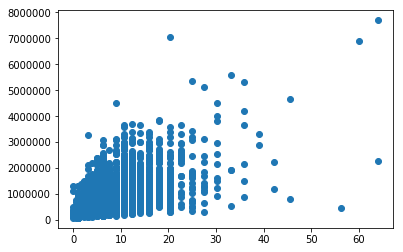

In [22]:
plt.scatter((df.bathrooms)**2, df.price)

In [23]:
#Modify columns and additional filter
x['built_ago'] = 2017 - x['yr_built']
x['have_basement'] = np.where(x['sqft_basement']>0, 1, 0)
x['renovated'] = np.where(x['yr_renovated']>0, 1, 0)
x['weighted_bath'] = x['bathrooms'] **2
x['weighted_livingspace'] = x['sqft_living'] **2
x['diff_living'] = x['sqft_living'] - x['sqft_living15']
x['bed_bath_ratio'] = (x['bedrooms']+1)/( x['bathrooms']+1)



In [24]:
x.have_basement.value_counts()

0    11907
1     6659
Name: have_basement, dtype: int64

In [25]:
# Define x and y
y= x.price
x = x.drop(['id','date','zipcode','lat','long','price','yr_renovated','yr_built','sqft_basement','bathrooms','grade'], axis=1)
x.shape

(18566, 86)

In [26]:
x.columns

Index([            'bedrooms',          'sqft_living',             'sqft_lot',
                     'floors',           'waterfront',                 'view',
                  'condition',           'sqft_above',        'sqft_living15',
                 'sqft_lot15',                  98002,                  98003,
                        98004,                  98005,                  98006,
                        98007,                  98008,                  98010,
                        98011,                  98014,                  98019,
                        98022,                  98023,                  98024,
                        98027,                  98028,                  98029,
                        98030,                  98031,                  98032,
                        98033,                  98034,                  98038,
                        98039,                  98040,                  98042,
                        98045,                  9805

In [27]:
#Train and test split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((14852, 86), (14852,), (3714, 86), (3714,))

In [28]:
#Regression Modeling
reg = linear_model.LinearRegression()
regmodel = reg.fit(x_train, y_train)
y_predtest = regmodel.predict(x_test)

In [29]:
#Root Mean Square
RMS = mean_squared_error(y_test, y_predtest)**0.5
RMS

87157.86966259716

In [30]:
# Lasso regression
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(x_train, y_train)
y_ls_predtest = ls.predict(x_test)
ls_rmse = mean_squared_error(y_test, y_ls_predtest)**0.5
ls_rmse

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


87163.75665713158

In [31]:
r2_score(y_test, y_ls_predtest)

0.8095141221507487

In [32]:
# Ridge regression
from sklearn.linear_model import Ridge
rg = Ridge()
rg.fit(x_train, y_train)
y_rg_predtest = rg.predict(x_test)
ls_rmse = mean_squared_error(y_test, y_rg_predtest)**0.5
ls_rmse

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.632253e-18
  overwrite_a=True).T


87346.71659950461

In [33]:
r2_score(y_test, y_rg_predtest)

0.8087136091017659

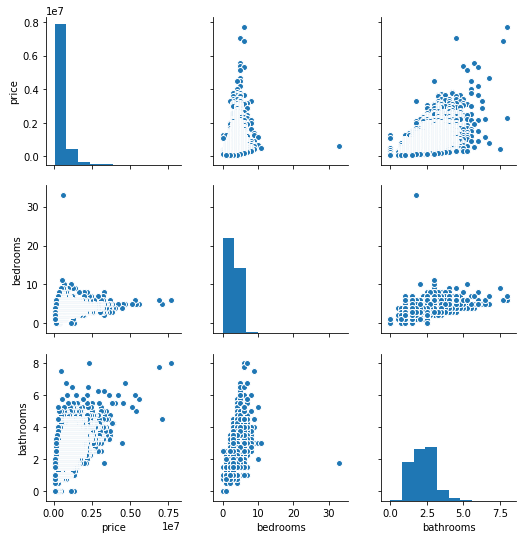

In [34]:
import seaborn as sns
#sns.pairplot(df)
sns.pairplot(df[['price','bedrooms', 'bathrooms']])